**Note**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" in [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) *before* reading this notebook to reset its output. If you cannot run this file on your machine, you may want to open it [in the cloud <img height="12" style="display: inline-block" src="../static/link/to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-data-science/main?urlpath=lab/tree/01_scientific_stack/00_content_numpy.ipynb).

# Chapter 1: Python's Scientific Stack (Part 1)

Python itself does not come with any scientific algorithms. However, over time, many third-party libraries emerged that are useful to build machine learning applications. In this context, "third-party" means that the libraries are *not* part of Python's standard library.

Among the popular ones are [numpy <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/) (numerical computations, linear algebra), [pandas <img height="12" style="display: inline-block" src="../static/link/to_pd.png">](https://pandas.pydata.org/) (data processing), [matplotlib <img height="12" style="display: inline-block" src="../static/link/to_plt.png">](https://matplotlib.org/) (visualisations), and [scikit-learn <img height="12" style="display: inline-block" src="../static/link/to_skl.png">](https://scikit-learn.org/stable/index.html) (machine learning algorithms).

## Extending Python with Third-party Packages

Before we can import these libraries, we must ensure that they installed on our computers. If you installed Python via the Anaconda Distribution that should already be the case. Otherwise, we can use Python's **package manager** `pip` to install them manually.

`pip` is a so-called command-line interface (CLI), meaning it is a program that is run within a terminal window. JupyterLab allows us to run such a CLI tool from within a notebook by starting a code cell with a single `%` symbol. Here, this does not mean Python's modulo operator but is just an instruction to JupyterLab that the following code is *not* Python.

So, let's proceed by installing [numpy <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/) and [matplotlib <img height="12" style="display: inline-block" src="../static/link/to_plt.png">](https://matplotlib.org/).

In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


After we have ensured that the third-party libraries are installed locally, we can simply go ahead with the `import` statement. All the libraries are commonly imported with shorter prefixes for convenient use later on.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Let's see how the data type provided by these scientific libraries differ from Python's built-in ones.

## Vectors and Matrices with Numpy

As an example, let's start by creating a `list` object.

In [4]:
vector = [1, 2, 3, 4, 5]

vector

[1, 2, 3, 4, 5]

We call the `list` object by the name `vector` as that is what the data is supposed to mean conceptually. As we remember from our linear algebra courses, vectors should implement scalar-multiplication. So, the following code cell should result in `[3, 6, 9, 12, 15]` as the answer. Surprisingly, the result is a new `list` with all the elements in `vector` repeated three times. That operation is called **concatenation** and is an example of a concept called **operator overloading**. That means that an operator, like `*` in the example, may exhibit a different behavior depending on the data type of its operands.

In [5]:
3 * vector

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

[numpy <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/), among others, provides a data type called an **n-dimensional array**. This may sound fancy at first but when used with only 1 or 2 dimensions, it basically represents vectors and matrices as we know them from linear algebra. Additionally, arrays allow for much faster computations as they are implemented in the very efficient [C language <img height="12" style="display: inline-block" src="../static/link/to_wiki.png">](https://en.wikipedia.org/wiki/C_%28programming_language%29) and optimized for numerical operations.

To create an array, we use the [np.array() <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html#numpy-array) constructor and provide it a `list` of values.

In [6]:
v1 = np.array([1, 2, 3, 4, 5])

v1

array([1, 2, 3, 4, 5])

In [7]:
type(v1)

numpy.ndarray

The vector `v1` can now be multiplied with a scalar yielding a result meaningful in the context of linear algebra.

In [8]:
v2 = 3 * v1

v2

array([ 3,  6,  9, 12, 15])

To model a matrix, we use a `list` of (row) `list`s of values. Note how the output below the cell contains *two* levels of brackets `[` and `]`.

In [9]:
m1 = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
])

m1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

Now we can use the [np.dot() <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot) function to multiply a matrix with a vector to obtain a new vector ...

In [10]:
v3 = np.dot(m1, v1)

v3

array([ 55, 130])

... or simply transpose it by accessing its [.T <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T) attribute.

In [11]:
m1.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

The rules from maths still apply and it makes a difference if a vector is multiplied from the left or the right by a matrix. The following operation will fail.

In [12]:
np.dot(v1, m1)

ValueError: shapes (5,) and (2,5) not aligned: 5 (dim 0) != 2 (dim 0)

## Indexing & Slicing

In order to retrieve only a subset of an array's data, we index or slice into it. This is similar to how we index or slice into `list` objects, in particular, if we deal with one-dimensional arrays like `v1`, `v2`, or `v3`.

In [13]:
v1

array([1, 2, 3, 4, 5])

Indexing may be done with either positive (`0`-based) indexes from the left or negative (`1`-based) indexes from the right.

Here, we obtain the first and the last element in `v1`.

In [14]:
v1[0]

1

In [15]:
v1[-1]

5

Slicing uses the same `:` notation as with `list`s taking *start*, *stop*, and *step* values.

In [16]:
v1[1:-1]

array([2, 3, 4])

In [17]:
v1[2:]

array([3, 4, 5])

In [18]:
v1[:-1]

array([1, 2, 3, 4])

In [19]:
v1[1:-1:2]

array([2, 4])

In [20]:
v1[::2]

array([1, 3, 5])

Indexing and slicing become slightly more complicated when working with higher dimensional arrays like `m1`. In principle, we must provide either an index or a slice for *each* dimension.

In [21]:
m1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

For example, to slice out the first row of the matrix, we write `[0, :]`. The `0` implies taking elements in *only* the *first* row and the `:` means taking elements across *all* columns.

In [22]:
m1[0, :]

array([1, 2, 3, 4, 5])

For sure, we could also *not* leave out the *start* and *stop* values along the second dimension and obtain the same result. But that would not only be unneccessary but also communicate a different meaning, namely to "take elements from the first through the fifth columns" instead of "take elements from all columns."

In [23]:
m1[0, 0:5]

array([1, 2, 3, 4, 5])

Whenever we take *all* elements in *later* dimensions (i.e., those more to the right), we may also drop the index or slice instead and keep only the *earlier* ones. However, the previous style is a bit more explicit in that we are working with a two-dimensional array.

In [24]:
m1[0]

array([1, 2, 3, 4, 5])

As another example, let's slice out elements across *all* rows but in only the *second* column. Colloquially, we can say that we "slice out the second column" from the matrix.

In [25]:
m1[:, 1]

array([2, 7])

If we wanted to slice out a smaller matrix from a larger one, we slice along both dimensions. Above, we have only sliced along one dimension while indexing into the other.

For example, to obtain a 2x2 square matrix consisting of the two left-most columns in `m1`, we can write the following.

In [26]:
m1[:2, :2]

array([[1, 2],
       [6, 7]])

Similarly, to slice out a 2x2 matrix consisting of the two right-most columns, we write the following.

In [27]:
m1[-2:, -2:]

array([[ 4,  5],
       [ 9, 10]])

To access individual elements as scalars, we combine two indexes along both dimensions.

For example, to access the element in the lower-left corner, we write the following.

In [28]:
m1[1, 0]

6

## Dimensionality vs. Shapes

Both, the vectors `v1`, `v2`, and `v3`, and the matrix `m1` have the *same* **data type** from a technical point of view, namely `np.ndarray`.

In [29]:
type(v1)

numpy.ndarray

In [30]:
type(m1)

numpy.ndarray

So, how can we tell that they have different dimensions without looking at how they are displayed below a code cell?

The `np.ndarray` type comes with a couple of **properties** that we can access via the dot notation. Examples are `.ndim` and `.shape`.

While `.ndim` simply tells us how many dimensions an array has, ...

In [31]:
v1.ndim

1

In [32]:
m1.ndim

2

... `.shape` reveals the structure of the elements. The one-element tuple `(5,)` below says that there is one dimension along which there are five elements ...

In [33]:
v1.shape

(5,)

... whereas the two-element tuple `(2, 5)` indicates that the array's elements are placed along two dimensions spanning a grid of two elements in one and five elements into the other dimension. We know such notations already from our linear algebra courses where we would call `m1` a 2x5 matrix.

In [34]:
m1.shape

(2, 5)

There is a relationship behind the dimensionality of an array we are slicing and indexing and what we get back as a result: Whenever we index into an array along some dimension, the result will have one dimension less than the original.

For example, if we start with a two-dimensional array like `m1` and slice along both dimensions, the result will also have two dimensions, even if it holds only one element.

In [35]:
m1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [36]:
m1[:1, :1]  # Note the double brackets

array([[1]])

If, on the contrary, we slice only along one of the two dimensions and index into the other, the result is a one-dimensional array. So, both of the below slices have the *same* properties and we cannot tell if one of them was (part of) a row or column in `m1`.

In [37]:
m1[1, :2]

array([6, 7])

In [38]:
m1[:, -1]

array([ 5, 10])

Finally, indexing along both dimensions gives us back a scalar value.

In [39]:
m1[0, 0]

1

## Array Constructors & Functions

[numpy <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/) provides various **constructors** (i.e., functions) to create all kinds of arrays.

For example, [np.linspace() <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) creates an array of equidistant numbers, often used to model the values on a function's x-axis. [np.pi <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/constants.html#numpy.pi) is an alias for Python's built-in `math.pi`. The cell below creates `100` coordinate points arranged between $-3\pi$ and $+3\pi$.

In [40]:
x = np.linspace(-3 * np.pi, 3 * np.pi, 100)

x

array([-9.42477796, -9.23437841, -9.04397885, -8.8535793 , -8.66317974,
       -8.47278019, -8.28238063, -8.09198108, -7.90158152, -7.71118197,
       -7.52078241, -7.33038286, -7.1399833 , -6.94958375, -6.75918419,
       -6.56878464, -6.37838508, -6.18798553, -5.99758598, -5.80718642,
       -5.61678687, -5.42638731, -5.23598776, -5.0455882 , -4.85518865,
       -4.66478909, -4.47438954, -4.28398998, -4.09359043, -3.90319087,
       -3.71279132, -3.52239176, -3.33199221, -3.14159265, -2.9511931 ,
       -2.76079354, -2.57039399, -2.37999443, -2.18959488, -1.99919533,
       -1.80879577, -1.61839622, -1.42799666, -1.23759711, -1.04719755,
       -0.856798  , -0.66639844, -0.47599889, -0.28559933, -0.09519978,
        0.09519978,  0.28559933,  0.47599889,  0.66639844,  0.856798  ,
        1.04719755,  1.23759711,  1.42799666,  1.61839622,  1.80879577,
        1.99919533,  2.18959488,  2.37999443,  2.57039399,  2.76079354,
        2.9511931 ,  3.14159265,  3.33199221,  3.52239176,  3.71

Besides constructors, [numpy <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/) provides all kinds of **vectorized** functions. The concept of **vectorization** means that a function is executed once for *each* element in an array. Vectorized functions are one major benefit of using [numpy <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/): Not only are they optimized heavily on the C level (i.e., "behind the scenes") but also allow us to avoid writing explicit `for`-loops that are for some technical reasons considered "slow" in Python.

For example, [np.sin() <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/generated/numpy.sin.html#numpy.sin) calculates the sine for each element in the `x` array. The resulting `y` array has thus the same `.shape` as `x`.

In [41]:
y = np.sin(x)

y

array([-3.67394040e-16, -1.89251244e-01, -3.71662456e-01, -5.40640817e-01,
       -6.90079011e-01, -8.14575952e-01, -9.09631995e-01, -9.71811568e-01,
       -9.98867339e-01, -9.89821442e-01, -9.45000819e-01, -8.66025404e-01,
       -7.55749574e-01, -6.18158986e-01, -4.58226522e-01, -2.81732557e-01,
       -9.50560433e-02,  9.50560433e-02,  2.81732557e-01,  4.58226522e-01,
        6.18158986e-01,  7.55749574e-01,  8.66025404e-01,  9.45000819e-01,
        9.89821442e-01,  9.98867339e-01,  9.71811568e-01,  9.09631995e-01,
        8.14575952e-01,  6.90079011e-01,  5.40640817e-01,  3.71662456e-01,
        1.89251244e-01, -1.22464680e-16, -1.89251244e-01, -3.71662456e-01,
       -5.40640817e-01, -6.90079011e-01, -8.14575952e-01, -9.09631995e-01,
       -9.71811568e-01, -9.98867339e-01, -9.89821442e-01, -9.45000819e-01,
       -8.66025404e-01, -7.55749574e-01, -6.18158986e-01, -4.58226522e-01,
       -2.81732557e-01, -9.50560433e-02,  9.50560433e-02,  2.81732557e-01,
        4.58226522e-01,  

Next, let's use [matplotlib <img height="12" style="display: inline-block" src="../static/link/to_plt.png">](https://matplotlib.org/)'s [plt.plot() <img height="12" style="display: inline-block" src="../static/link/to_plt.png">](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) function to visualize the sine curve between $-3\pi$ and $+3\pi$.

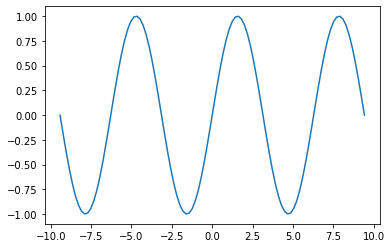

In [42]:
plt.plot(x, y)

If we use only `10` equidistant points for `x`, the resulting curve does not look like a curve. There is a trade-off behind this: To make nice plots, we need a rather high granularity of data points. That, however, causes more computations in the background making the plotting slower. With toy data like the one here this is not an issue. For real life data that may be different.

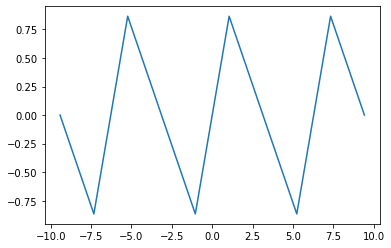

In [43]:
x = np.linspace(-3 * np.pi, 3 * np.pi, 10)
y = np.sin(x)

plt.plot(x, y)

[numpy <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/) provides further constructors. Most notably are the ones in the [np.random <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random) module that mirrors the [random <img height="12" style="display: inline-block" src="../static/link/to_py.png">](https://docs.python.org/3/library/random.html) module in the [standard library <img height="12" style="display: inline-block" src="../static/link/to_py.png">](https://docs.python.org/3/library/index.html): For example, [np.random.normal() <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal) and [np.random.gamma() <img height="12" style="display: inline-block" src="../static/link/to_np.png">](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html#numpy.random.gamma) return arrays whose elements follow the normal and gamma probability distributions.

Let us quickly generate some random data points and draw a scatter plot with [matplotlib <img height="12" style="display: inline-block" src="../static/link/to_plt.png">](https://matplotlib.org/)'s [plt.scatter() <img height="12" style="display: inline-block" src="../static/link/to_plt.png">](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) function.

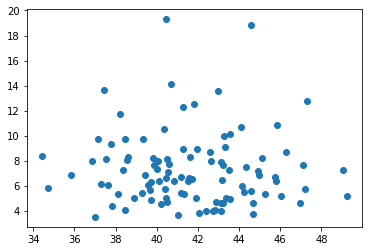

In [44]:
x = np.random.normal(42, 3, 100)
y = np.random.gamma(7, 1, 100)

plt.scatter(x, y)